In [174]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df = pd.read_csv('Final_cars_data.csv')

In [175]:
df.dtypes

Year            int64
Model          object
Type           object
price           int64
mileage         int64
colour         object
city_mpg        int64
highway_mpg     int64
Pin code        int64
Area           object
contact         int64
id              int64
dtype: object

In [176]:
df.head()

,Year,Model,Type,price,mileage,colour,city_mpg,highway_mpg,Pin code,Area,contact,id
0,2013,Mustang,Ecoboost,10595,52412,Red,19,19,90250,"Hawthorne ,CA",4245677378,831406509
1,2014,Mustang,Ecoboost,17950,91875,Black,19,19,36608,"Mobile ,AL",2512572800,844891639
2,2005,Mustang,Premium,9690,92385,Sonic Blue Metallic,19,19,20152,"Chantilly ,VA",8553512738,841743756
3,2009,Mustang,GT,13969,97789,Dark Candy Apple Red,15,15,45177,"Wilmington ,OH",9375563097,844440740
4,2014,Mustang,GT,32990,18781,Silver,15,15,48105,"Ann Arbor ,MI",9018810260,848436197


In [177]:
df.Model.value_counts()

Mustang    7743
SHELBY      648
Name: Model, dtype: int64

<AxesSubplot:>

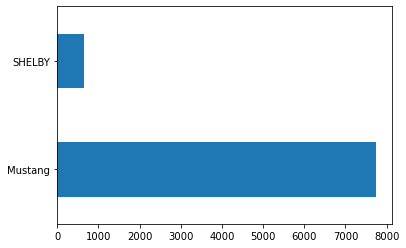

In [178]:
df.Model.value_counts().plot(kind = 'barh')

In [179]:
df.Type.value_counts()

GT          3939
Ecoboost    1866
Mach-E      1037
Premium      765
GT500        417
GT350        221
Bullitt       78
Boss          54
Standard      10
PREMIUM        3
BULLITT        1
Name: Type, dtype: int64

<AxesSubplot:>

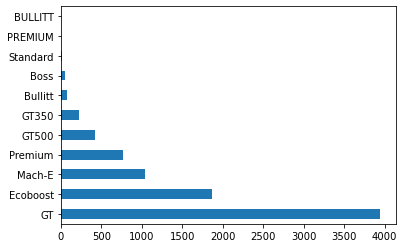

In [180]:
df.Type.value_counts().plot(kind = 'barh')

dropping these contact and id features but will be usin them in the final deployemnet. 

In [181]:
df = df.drop(['contact', 'id', 'Pin code', 'Area'], axis = 1)
df.head()

,Year,Model,Type,price,mileage,colour,city_mpg,highway_mpg
0,2013,Mustang,Ecoboost,10595,52412,Red,19,19
1,2014,Mustang,Ecoboost,17950,91875,Black,19,19
2,2005,Mustang,Premium,9690,92385,Sonic Blue Metallic,19,19
3,2009,Mustang,GT,13969,97789,Dark Candy Apple Red,15,15
4,2014,Mustang,GT,32990,18781,Silver,15,15


In [182]:
df['colour'] = df['colour'].str.lower()
df['Type'] = df['Type'].str.lower()
df.head()

,Year,Model,Type,price,mileage,colour,city_mpg,highway_mpg
0,2013,Mustang,ecoboost,10595,52412,red,19,19
1,2014,Mustang,ecoboost,17950,91875,black,19,19
2,2005,Mustang,premium,9690,92385,sonic blue metallic,19,19
3,2009,Mustang,gt,13969,97789,dark candy apple red,15,15
4,2014,Mustang,gt,32990,18781,silver,15,15


In [183]:
df['Model'].value_counts()

Mustang    7743
SHELBY      648
Name: Model, dtype: int64

In [184]:
df['Type'].value_counts()

gt          3939
ecoboost    1866
mach-e      1037
premium      768
gt500        417
gt350        221
bullitt       79
boss          54
standard      10
Name: Type, dtype: int64

In [185]:
df['colour'].value_counts().head(20)

shadow black                           1061
black                                   917
oxford white                            570
red                                     477
white                                   435
blue                                    375
gray                                    369
race red                                338
magnetic metallic                       307
magnetic                                258
silver                                  251
ingot silver metallic                   163
iconic silver metallic                  147
ruby red metallic tinted clearcoat      146
orange                                  134
rapid red metallic tinted clearcoat     132
star white                              130
carbonized gray metallic                125
kona blue metallic                      123
grabber blue                             97
Name: colour, dtype: int64

In [186]:
df['colour'] = df['colour'].str.rstrip()
df['colour'] = df['colour'].str.lstrip()
df.head()

,Year,Model,Type,price,mileage,colour,city_mpg,highway_mpg
0,2013,Mustang,ecoboost,10595,52412,red,19,19
1,2014,Mustang,ecoboost,17950,91875,black,19,19
2,2005,Mustang,premium,9690,92385,sonic blue metallic,19,19
3,2009,Mustang,gt,13969,97789,dark candy apple red,15,15
4,2014,Mustang,gt,32990,18781,silver,15,15


In [187]:
df["car_colour"] = df["colour"].map(lambda x: 'red' if 'red' in x else 
                                         'black' if 'black' in x else 
                                         'blue' if 'blue' in x else
                                         'white' if 'white' in x else 
                                         'silver' if 'silver' in x else
                                         'magnetic' if 'magnetic' in x else
                                         'gray' if 'gray' in x else
                                         'orange' if 'orange' in x else
                                         'green' if 'green' in x else
                                         'yellow' if 'yellow' in x else
                                         'marron' if 'maroon' in x else
                                         'other')
df.head(10)

,Year,Model,Type,price,mileage,colour,city_mpg,highway_mpg,car_colour
0,2013,Mustang,ecoboost,10595,52412,red,19,19,red
1,2014,Mustang,ecoboost,17950,91875,black,19,19,black
2,2005,Mustang,premium,9690,92385,sonic blue metallic,19,19,blue
3,2009,Mustang,gt,13969,97789,dark candy apple red,15,15,red
4,2014,Mustang,gt,32990,18781,silver,15,15,silver
5,2011,Mustang,gt,24500,44916,black,17,17,black
6,2013,Mustang,ecoboost,13988,102821,ingot silver metallic,19,19,silver
7,2013,Mustang,ecoboost,16850,83153,red,19,19,red
8,2013,Mustang,gt,25990,75662,gray,15,15,gray
9,2010,Mustang,ecoboost,9998,121219,kona blue metallic,18,18,blue


In [188]:
df['car_colour'].value_counts().head(20)

black       2020
white       1353
red         1344
blue        1149
silver       704
gray         627
magnetic     567
orange       210
other        168
green        166
yellow        70
marron        13
Name: car_colour, dtype: int64

In [189]:
df['Type'].value_counts().head(20)

gt          3939
ecoboost    1866
mach-e      1037
premium      768
gt500        417
gt350        221
bullitt       79
boss          54
standard      10
Name: Type, dtype: int64

In [190]:
df = df.drop(['colour'], axis = 1)
df.head()

,Year,Model,Type,price,mileage,city_mpg,highway_mpg,car_colour
0,2013,Mustang,ecoboost,10595,52412,19,19,red
1,2014,Mustang,ecoboost,17950,91875,19,19,black
2,2005,Mustang,premium,9690,92385,19,19,blue
3,2009,Mustang,gt,13969,97789,15,15,red
4,2014,Mustang,gt,32990,18781,15,15,silver


In [191]:
df.to_csv('Cleaned_data.csv')

In [192]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
df['Model'] = ordinal_encoder.fit_transform(df[['Model']])
df['car_colour'] = ordinal_encoder.fit_transform(df[['car_colour']])
df['Type'] = ordinal_encoder.fit_transform(df[['Type']])
df.head()

,Year,Model,Type,price,mileage,city_mpg,highway_mpg,car_colour
0,2013,0.0,2.0,10595,52412,19,19,8.0
1,2014,0.0,2.0,17950,91875,19,19,0.0
2,2005,0.0,7.0,9690,92385,19,19,1.0
3,2009,0.0,3.0,13969,97789,15,15,8.0
4,2014,0.0,3.0,32990,18781,15,15,9.0


9577.463940871663


/Users/gowtham_babu/Desktop/tf/env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

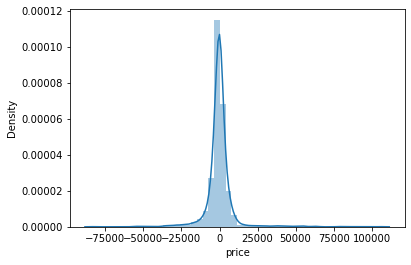

In [217]:
y = df['price']
X = df.drop(['price'], axis = 1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


from sklearn.ensemble import RandomForestRegressor

tree_reg = RandomForestRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error
final_predictions = tree_reg.predict(X_test)
final_mse = mean_squared_error(y_test, final_predictions)


print(final_mse**0.5)
sns.distplot(y_test - final_predictions)

#### create a baseline model

9571.217044580011


/Users/gowtham_babu/Desktop/tf/env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

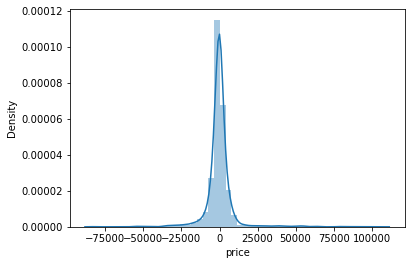

In [18]:
y = df['price']
X = df.drop(['price'], axis = 1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


from sklearn.ensemble import RandomForestRegressor

tree_reg = RandomForestRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error
final_predictions = tree_reg.predict(X_test)
final_mse = mean_squared_error(y_test, final_predictions)

print(final_mse**0.5)
sns.distplot(y_test - final_predictions)

In [19]:
importance = tree_reg.feature_importances_

    
ft = list(zip(df.columns, importance.tolist()))

sorted(zip(importance, df.columns), reverse=True)[:10]

[(0.5545652245311251, 'price'),
 (0.19263105537847725, 'mileage'),
 (0.07520851847269366, 'Year'),
 (0.05765842434048786, 'Model'),
 (0.05685258571008833, 'highway_mpg'),
 (0.033609559339016305, 'Type'),
 (0.029474632228111513, 'city_mpg')]

since, there might not be a huge importance of the remaining features, we can drop some of the columns before going to buiding a big model

##### Grid Search 

In [20]:
y = df['price']
X = df.drop(['price'], axis = 1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestRegressor

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3,4, 5, 6, 7, 8, 9, 10], 'max_features': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
  ]


forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

/Users/gowtham_babu/Desktop/tf/env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
165 fits failed out of a total of 510.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/gowtham_babu/Desktop/tf/env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/gowtham_babu/Desktop/tf/env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 442, in fit
    trees = Parallel(
  File "/Users/gowtham_babu/Desktop/tf/env/lib/python3.9/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.d

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False],
                          'max_features': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'n_estimators': [3, 4, 5, 6, 7, 8, 9, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [21]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30, random_state=42)

In [22]:
final_model = grid_search.best_estimator_

/Users/gowtham_babu/Desktop/tf/env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


9663.030114633042


<AxesSubplot:xlabel='price', ylabel='Density'>

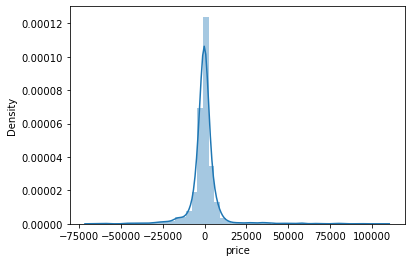

In [23]:
final_predictions = final_model.predict(X_test)

from sklearn.metrics import mean_squared_error
final_mse = mean_squared_error(y_test, final_predictions)
print(final_mse**0.5)
sns.distplot(y_test - final_predictions)

In [24]:
feature_importances = grid_search.best_estimator_.feature_importances_

ft = list(zip(df.columns, feature_importances.tolist()))

sorted(zip(feature_importances, df.columns), reverse=True)[:6]

[(0.5228959277239239, 'price'),
 (0.14950782760496842, 'mileage'),
 (0.0962082212607876, 'Model'),
 (0.09253065903254536, 'Year'),
 (0.056037056854150426, 'highway_mpg'),
 (0.04606408223668596, 'city_mpg')]

#### Random Search cv

In [25]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg,
                                param_distributions=param_distribs,
                                n_iter=10, cv=5, 
                                scoring='neg_mean_squared_error',
                                random_state=42)
rnd_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1441c8ac0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1441c8a90>},
                   random_state=42, scoring='neg_mean_squared_error')

In [26]:
final_model = rnd_search.best_estimator_

9580.640875726116


/Users/gowtham_babu/Desktop/tf/env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

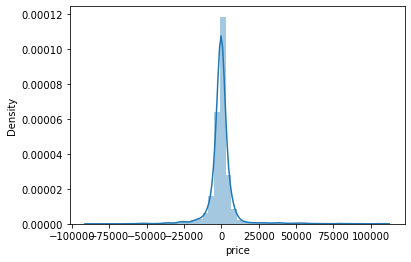

In [27]:
final_predictions = final_model.predict(X_test)
final_mse = mean_squared_error(y_test, final_predictions)
print(final_mse**0.5)
sns.distplot(y_test - final_predictions)

### Deep learning model

In [12]:
import tensorflow as tf

from tensorflow import keras 

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

In [13]:
y = df['price']
X = df.drop(['price'], axis = 1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
model_1 = Sequential()
model_1.add(Dense(12,input_shape = (29,),activation = 'relu'))
model_1.add(Dense(12,activation = 'relu'))
model_1.add(Dense(12,activation = 'relu'))
model_1.add(Dense(12,activation = 'relu'))
model_1.add(Dense(12,activation = 'relu'))
model_1.add(Dense(12,activation = 'relu'))
model_1.add(Dense(12,activation = 'relu'))
model_1.add(Dense(12,activation = 'relu'))
model_1.add(Dense(12,activation = 'relu'))
model_1.add(Dense(1,activation='relu'))

In [ ]:
model_1.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model_1.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test))
mse_test = model_1.evaluate(X_test, y_test)
#X_new = X_test[:3]
y_pred = model_1.predict(X_test)

In [24]:
from sklearn.metrics import mean_squared_error
y_pred = model_1.predict(X_test)
final_mse = mean_squared_error(y_test, y_pred)
final_mse

1617305424.3014297

In [19]:
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 30)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mean_absolute_error',
        metrics=['mean_absolute_error'])
    return model

In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
tuner = RandomSearch(
    build_model,
    objective='val_mean_absolute_error',
    max_trials=5,
    executions_per_trial=3,
    directory='project',
    project_name='Air Quality Index3')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  after removing the cwd from sys.path.


In [21]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
tuner.search(X_train, y_train,
             epochs = 100,
             validation_data=(X_test, y_test), callbacks=[stop_early])

Trial 5 Complete [00h 09m 24s]
val_mean_absolute_error: 12891.56640625

Best val_mean_absolute_error So Far: 5554.872884114583
Total elapsed time: 00h 44m 22s
INFO:tensorflow:Oracle triggered exit


In [22]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the optimal hyperparameters and train it on the data for 100 epochs
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

val_acc_per_epoch = history.history['mean_absolute_error']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/100
147/147 [==============================] - 5s 29ms/step - loss: 14714.3467 - mean_absolute_error: 14714.3467 - val_loss: 8822.3398 - val_mean_absolute_error: 8822.3398
Epoch 2/100
147/147 [==============================] - 4s 27ms/step - loss: 8993.9316 - mean_absolute_error: 8993.9316 - val_loss: 10153.7578 - val_mean_absolute_error: 10153.7578
Epoch 3/100
147/147 [==============================] - 4s 27ms/step - loss: 7285.2798 - mean_absolute_error: 7285.2798 - val_loss: 9353.6523 - val_mean_absolute_error: 9353.6523
Epoch 4/100
147/147 [==============================] - 4s 27ms/step - loss: 7832.3823 - mean_absolute_error: 7832.3823 - val_loss: 5980.0371 - val_mean_absolute_error: 5980.0371
Epoch 5/100
147/147 [==============================] - 4s 27ms/step - loss: 7109.9277 - mean_absolute_error: 7109.9277 - val_loss: 7378.0186 - val_mean_absolute_error: 7378.0186
Epoch 6/100
147/147 [==============================] - 4s 27ms/step - loss: 6786.0615 - mean_absolute_erro

In [23]:
hypermodel = tuner.hypermodel.build(best_hps)

# Retrain the model
hypermodel.fit(X_train, y_train, epochs=best_epoch, validation_split=0.2)

Epoch 1/91
147/147 [==============================] - 6s 31ms/step - loss: 18358.1465 - mean_absolute_error: 18358.1465 - val_loss: 10590.7998 - val_mean_absolute_error: 10590.7998
Epoch 2/91
147/147 [==============================] - 4s 29ms/step - loss: 8929.5576 - mean_absolute_error: 8929.5576 - val_loss: 6753.0195 - val_mean_absolute_error: 6753.0195
Epoch 3/91
147/147 [==============================] - 4s 28ms/step - loss: 7962.1890 - mean_absolute_error: 7962.1890 - val_loss: 7726.3896 - val_mean_absolute_error: 7726.3896
Epoch 4/91
147/147 [==============================] - 4s 28ms/step - loss: 7640.7568 - mean_absolute_error: 7640.7568 - val_loss: 7614.7983 - val_mean_absolute_error: 7614.7983
Epoch 5/91
147/147 [==============================] - 4s 28ms/step - loss: 7893.6533 - mean_absolute_error: 7893.6533 - val_loss: 7431.9609 - val_mean_absolute_error: 7431.9609
Epoch 6/91
147/147 [==============================] - 4s 28ms/step - loss: 7657.6211 - mean_absolute_error: 765

In [24]:
eval_result = hypermodel.evaluate(X_test, y_test)
print("[test loss, test accuracy]:", eval_result)

79/79 [==============================] - 1s 7ms/step - loss: 5537.3457 - mean_absolute_error: 5537.3457
[test loss, test accuracy]: [5537.345703125, 5537.345703125]


In [25]:
from sklearn.metrics import mean_squared_error
y_pred = hypermodel.predict(X_test)
final_mse = mean_squared_error(y_test, y_pred)
final_mse

148910952.99767578

### Best model

Picking random forest as the best model for our project

In [225]:
xnew = [2017, 'Mustang', 'premium', 20412, 19, 19, 'white']

xnew[1] = xnew[1].lower()
xnew[2] = xnew[2].lower()
xnew[-1] = xnew[-1].lower()

model = []
if xnew[1] == 'mustang':
    model.append(0)
else:
    model.append(1)
print(model)

typ = []
if xnew[2] == 'gt':
    typ.append(3)
elif xnew[2] == 'ecoboost':
    typ.append(2)
elif xnew[2] == 'mach-e':
    typ.append(6)
elif xnew[2] == 'premium':
    typ.append(7)
elif xnew[2] == 'gt500':
    typ.append(5)
elif xnew[2] == 'gt350':
    typ.append(4)
elif xnew[2] == 'bullitt':
    typ.append(1)
elif xnew[2] == 'boss':
    typ.append(0)
else:
    typ.append(8)
print(typ)
    
    
col = []
if xnew[-1] == 'black':
    col.append(1)
elif xnew[-1] == 'white':
    col.append(10)
elif xnew[-1] == 'red':
    col.append(8)
elif xnew[-1] == 'blue':
    col.append(1)
elif xnew[-1] == 'silver':
    col.append(9)
elif xnew[-1] == 'gray':
    col.append(2)
elif xnew[-1] == 'magnetic':
    col.append(4)
elif xnew[-1] == 'orange':
    col.append(6)
elif xnew[-1] == 'other':
    col.append(7)
elif xnew[-1] == 'green':
    col.append(3)
elif xnew[-1] == 'yellow':
    col.append(11)
else:
    col.append(5)
print(col)
    
a = list()
a.append(xnew[0])
b = model
c = typ
d = xnew[3:6]
e = col

pred = a + b + c + d + e
print(pred)

[0]
[7]
[10]
[2017, 0, 7, 20412, 19, 19, 10]


In [226]:
y_pred = tree_reg.predict([pred])
print(y_pred)

[21127.19]


/Users/gowtham_babu/Desktop/tf/env/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
